In [1]:
import pandas as pd
import numpy as np

listingsDF = pd.read_csv('listings.csv')

calendarDF = pd.read_csv('calendar.csv')

reviewsDF = pd.read_csv('reviews.csv')

In [2]:
#We clean reviews first

#We need to remove '(email hidden)', special symbols
reviewsDF = reviewsDF.loc[reviewsDF['reviewer_name'].str.contains(r'[^\x00-\x7F]+') == False]

reviewsDF = reviewsDF.loc[reviewsDF['reviewer_name'].str.contains('email hidden') == False]

#Then replace '()', '-'
reviewsDF.reviewer_name = reviewsDF.reviewer_name.str.replace('[()]', '')

reviewsDF.reviewer_name = reviewsDF.reviewer_name.str.replace('[-]', ' ')

#Then replace 'And' with '&'
reviewsDF.reviewer_name = reviewsDF.reviewer_name.str.replace('And', '&')

#Now we remove all rows with empty cells
reviewsDF = reviewsDF.dropna(axis=0, how='any')

#Convert date from object into datetime
#reviewsDF.date = pd.to_datetime(reviewsDF.date)

#I dont think we need date so dropping it
reviewsDF.drop(columns=['date'], inplace=True)

#Check for row
#reviewsDF.loc[reviewsDF['reviewer_id'] == 12120141]

reviewsDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84283 entries, 0 to 84848
Data columns (total 5 columns):
listing_id       84283 non-null int64
id               84283 non-null int64
reviewer_id      84283 non-null int64
reviewer_name    84283 non-null object
comments         84283 non-null object
dtypes: int64(3), object(2)
memory usage: 3.9+ MB


In [3]:
#Now we clean listings

#Instead of dropping we select what we need
listingsDF = listingsDF[['id', 'name','description', 
                         'host_id', 'host_name', 'property_type', 'price', 
                         'number_of_reviews', 'review_scores_rating']]

#We drop all rows with empty cells
listingsDF = listingsDF.dropna(axis=0, how='any')

#Remove the '$' from price
listingsDF.price = listingsDF.price.str.replace('[$]', '')

#Remove the ',' from price
listingsDF.price = listingsDF.price.str.replace(',', '')

#Convert price from object to float
listingsDF['price'] = listingsDF['price'].astype(float)

listingsDF.head()

,id,name,description,host_id,host_name,property_type,price,number_of_reviews,review_scores_rating
0,241032,Stylish Queen Anne Apartment,Make your self at home in this charming one-be...,956883,Maija,Apartment,85.0,207,95.0
1,953595,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,5177328,Andrea,Apartment,150.0,43,96.0
2,3308979,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,16708587,Jill,House,975.0,20,97.0
4,278830,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,1452570,Emily,House,450.0,38,92.0
5,5956968,Private unit in a 1920s mansion,We're renting out a small private unit of one ...,326758,Andrew,House,120.0,17,95.0


In [4]:
#We want to merge these 2 DFs, as our main focus is on the reviews, we will use reviewsDF as main
#In reviewsDF, "id" is the primary key, "listing_id" is the foreign key
#In listingsDF, "id" is the primary key
#We want to select where reviews.listings_id = listings.id;
#But since the column name is different, we will rename listingsDF.id to listingsDF.listing_id

listingsDF.rename(columns={'id': 'listing_id'}, inplace=True)
reviewsMDF = pd.merge(reviewsDF, listingsDF, on="listing_id")


In [5]:
#Swapping columns to make it look nicer
reviewsMDF = reviewsMDF.reindex(columns=["id","reviewer_id","reviewer_name","comments","listing_id","name","description","host_id","host_name","property_type","price","number_of_reviews","review_scores_rating"])

#Im gonna export to csv to view the data
#reviewsMDF.to_csv('Merged.csv')

In [6]:
reviewsMDF.info()
reviewsMDF.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84263 entries, 0 to 84262
Data columns (total 13 columns):
id                      84263 non-null int64
reviewer_id             84263 non-null int64
reviewer_name           84263 non-null object
comments                84263 non-null object
listing_id              84263 non-null int64
name                    84263 non-null object
description             84263 non-null object
host_id                 84263 non-null int64
host_name               84263 non-null object
property_type           84263 non-null object
price                   84263 non-null float64
number_of_reviews       84263 non-null int64
review_scores_rating    84263 non-null float64
dtypes: float64(2), int64(5), object(6)
memory usage: 9.0+ MB


,id,reviewer_id,reviewer_name,comments,listing_id,name,description,host_id,host_name,property_type,price,number_of_reviews,review_scores_rating
0,38917982,28943674,Bianca,Cute and cozy place. Perfect location to every...,7202016,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,37686877,Kelly,Apartment,75.0,16,95.0
1,39087409,32440555,Frank,Kelly has a great room in a very central locat...,7202016,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,37686877,Kelly,Apartment,75.0,16,95.0
2,39820030,37722850,Ian,"Very spacious apartment, and in a great neighb...",7202016,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,37686877,Kelly,Apartment,75.0,16,95.0
3,40813543,33671805,George,Close to Seattle Center and all it has to offe...,7202016,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,37686877,Kelly,Apartment,75.0,16,95.0
4,41986501,34959538,Ming,Kelly was a great host and very accommodating ...,7202016,Cute Mid Century near Downtown,Cute mid century condo within walking distance...,37686877,Kelly,Apartment,75.0,16,95.0


In [7]:
#Testing NLP with just 1 listing first

testDF = reviewsMDF.loc[reviewsMDF['listing_id']==7202016]

#I only want the reviews and the reviewer_name
testDF2 = testDF[['reviewer_name', 'comments']] 

#testDF2.loc[testDF2['reviewer_name']=='Bianca']

#And only first 5 rows to test
testDF2 = testDF2.head(5)
testDF2.head()

,reviewer_name,comments
0,Bianca,Cute and cozy place. Perfect location to every...
1,Frank,Kelly has a great room in a very central locat...
2,Ian,"Very spacious apartment, and in a great neighb..."
3,George,Close to Seattle Center and all it has to offe...
4,Ming,Kelly was a great host and very accommodating ...


In [8]:
#A1

#First we "clean" the data again (comments only) by removing all punctuations, numbers, and convert all to lowercase. 

#regex library so we can remove the special characters
import re 
import string

pd.set_option('display.max_colwidth', -1)

#We convert all columns and their values to lowercase first
testDF2 = testDF2.apply(lambda x: x.str.lower()) #I do this because i want to convert ALL columns

#Then we remove all numbers because we only want text
testDF2['comments'] = testDF2['comments'].str.replace('\d+', '') #\d stands for any digit and + means 1 or more 

#As you can see we still have '\r' '\n' ',' '.' '()' that we need to remove

testDF2['comments'] = testDF2['comments'].str.replace('[^\w\s]', '') #This removes all the punctuations
testDF2['comments'] = testDF2['comments'].str.replace(r'\n',' ', regex=True) #This relaces the \n with space
testDF2['comments'] = testDF2['comments'].str.replace(r'\r','', regex=True) #\r

testDF2

#This is called a corpus | A collection of text



,reviewer_name,comments
0,bianca,cute and cozy place perfect location to everything
1,frank,kelly has a great room in a very central location beautiful building architecture and a style that we really like we felt guite at home here and wish we had spent more time went for a walk and found seattle center with a major food festival in progress what a treat visited the space needle and the chihuly glass exhibit then pikes place market wow thanks for a great stay
2,ian,very spacious apartment and in a great neighborhood this is the kind of apartment i wish i had didnt really get to meet kelly until i was on my out but she was always readily available by phone i believe the only issue if you want to call it that was finding a place to park but i sincerely doubt its easy to park anywhere in a residential area after pm on a friday
3,george,close to seattle center and all it has to offer ballet theater museum space needle restaurants of all ilk just blocks away and the metropolitan probably the coolest grocer youll ever find easy to find and kelly was warm welcoming and really interesting to talk to
4,ming,kelly was a great host and very accommodating in a great neighborhood she has some great coffee and while i wasnt around much during my stay the time i spent interacting with her was very pleasant the apartment is in a great location and very close to the seattle center the neighborhood itself has a lot of good food as well


In [9]:
#A2

#Then we tokenize the text. Tokenization is the process of splitting the sentences into words.

#install -c anaconda nltk
#pip install --user -U nltk #Run these in ur cmd
#open cmd>type in python>import nltk>nltk.download()

#tokenize library
# from nltk.tokenize import word_tokenize

# DF2tokenize = testDF2
# DF2tokenize['comments'] = testDF2['comments'].apply(word_tokenize)
# DF2tokenize.head()



In [10]:
#A3

#Then we include the "stop words". "stop words" are words that have little to none meanings. e.g. "and" , "or", "a".

#stopwords library from nltk
# from nltk.corpus import stopwords

# stop_words = stopwords.words('english')

# #DF2tokenize['comments'] = DF2tokenize['comments'].str.replace(stop_words, '') #Cant use this because the comments column has became a list of strings
# DF2tokenize['comments'] = DF2tokenize['comments'].apply(lambda x: [item for item in x if item not in stop_words]) #So we iterate and replace
# DF2tokenize.head()

#We can also edit the english file and add in our own 'stop words'

In [11]:
#When we get to this, it is called "bag of words", it is a vocab of all the unique words in the text.
#A Collection of words to represent the text where order dont matter.

#print(DF2tokenize['comments'][0])

#Here we can see how many words each row has

#for i in range(len(DF2tokenize['comments'])):
#    print(len(DF2tokenize['comments'][i]))


In [12]:
#A4

#Now we do "Vectorization", so that the machine learning algorithm can use it.
#We put all these words into a vector matrix, because we are going to have multiple reviews.
#This will display the number of times each word appears in the text / Calculating the frequency of each word

#First we want to find the frequency of each word for each row

#####################Not working#################
#from nltk.probability import FreqDist #library to count words |FreqDist = frequency distribution

#fd = FreqDist()

# for word in DF2tokenize['comments'][0]: #For 1 row
#     fd[word]+=1
# fd

# fd = FreqDist(DF2tokenize['comments'])
# fd = pd.DataFrame.from_dict(fd, orient='index')
# fd.columns = ['Frequency']
# fd.index.name = "Words"
# print(fd)
#Does not work |unhashable type: list
#####################Not working#################
#We need to make the comments column not a 'list' but idk how to do that 
#DF2tokenize = DF2tokenize.applymap(lambda x: x[0] if isinstance(x, list) else x) #Not working




#Ditch above use CountVectorizor
#If we do these below we can skip A2 and A3
#These steps below are tokenization + stop words filter + vectorization 

from sklearn.feature_extraction.text import CountVectorizer
#from nltk.corpus import stopwords #We are going to use NLTK's stop word

#stop_words = stopwords.words('english')


#For the comments, remove stop words 
cv = CountVectorizer(stop_words='english')

#Transform into Count Vectorizor form
cVector = cv.fit_transform(testDF2['comments'])

#Make it into a dataframe
cVectorMatrix = pd.DataFrame(cVector.toarray(), columns=cv.get_feature_names())
cVectorMatrix.index = testDF2['reviewer_name']
cVectorMatrix


,accommodating,apartment,architecture,area,available,away,ballet,beautiful,believe,blocks,...,visited,walk,want,warm,wasnt,welcoming,went,wish,wow,youll
reviewer_name,,,,,,,,,,,,,,,,,,,,,
bianca,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
frank,0,0,1,0,0,0,0,1,0,0,...,1,1,0,0,0,0,1,1,1,0
ian,0,2,0,1,1,0,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
george,0,0,0,0,0,1,1,0,0,1,...,0,0,0,1,0,1,0,0,0,1
ming,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [13]:
#cVectorMatrix.to_csv('test.csv')

In [14]:
#B1

#We do EDA on this set of data that we cleaned
#So we want to find the "Top" words, the most common word used, we can find it easily by using the table above, hence Vectorization
#Then we put these "Top" words into a word cloud (Because word clouds look nicer than bar charts)
#Does the data make sense? If not backtrack and check if we need to add more stop words

vmDF = cVectorMatrix
vmDF = vmDF.transpose()

#We store the "Top" words into a dict
topD = {}

for x in vmDF.columns:
    top = vmDF[x].sort_values(ascending=False).head(20)
    topD[x] = list(zip(top.index, top.values))

topD

{'bianca': [('location', 1),
  ('place', 1),
  ('cute', 1),
  ('cozy', 1),
  ('perfect', 1),
  ('issue', 0),
  ('just', 0),
  ('finding', 0),
  ('food', 0),
  ('friday', 0),
  ('kind', 0),
  ('kelly', 0),
  ('glass', 0),
  ('good', 0),
  ('great', 0),
  ('interesting', 0),
  ('grocer', 0),
  ('felt', 0),
  ('guite', 0),
  ('home', 0)],
 'frank': [('great', 2),
  ('central', 1),
  ('building', 1),
  ('center', 1),
  ('progress', 1),
  ('chihuly', 1),
  ('place', 1),
  ('pikes', 1),
  ('needle', 1),
  ('exhibit', 1),
  ('market', 1),
  ('major', 1),
  ('wow', 1),
  ('location', 1),
  ('like', 1),
  ('felt', 1),
  ('kelly', 1),
  ('festival', 1),
  ('food', 1),
  ('glass', 1)],
 'ian': [('park', 2),
  ('apartment', 2),
  ('readily', 1),
  ('spacious', 1),
  ('place', 1),
  ('easy', 1),
  ('pm', 1),
  ('doubt', 1),
  ('didnt', 1),
  ('really', 1),
  ('residential', 1),
  ('neighborhood', 1),
  ('finding', 1),
  ('sincerely', 1),
  ('friday', 1),
  ('meet', 1),
  ('kelly', 1),
  ('kind', 1)

In [15]:
#B2

#Let us see the top few words used by each person

for reviewer, top in topD.items():
    print(reviewer)
    print(' '.join([word for word, count in top[0:9]]))
    print('   ')


bianca
location place cute cozy perfect issue just finding food
   
frank
great central building center progress chihuly place pikes needle
   
ian
park apartment readily spacious place easy pm doubt didnt
   
george
youll easy seattle restaurants coolest really ilk probably offer
   
ming
great neighborhood lot spent apartment center close coffee food
   


In [16]:
#B3.1

#This is to find out the most common words said by all reviewers.
#Use this to add stop words

from collections import Counter

words = []

for reviewer in vmDF.columns:
    top = [word for (word, count) in topD[reviewer]]
    
    for x in top:
        words.append(x)
        
words

['location',
 'place',
 'cute',
 'cozy',
 'perfect',
 'issue',
 'just',
 'finding',
 'food',
 'friday',
 'kind',
 'kelly',
 'glass',
 'good',
 'great',
 'interesting',
 'grocer',
 'felt',
 'guite',
 'home',
 'great',
 'central',
 'building',
 'center',
 'progress',
 'chihuly',
 'place',
 'pikes',
 'needle',
 'exhibit',
 'market',
 'major',
 'wow',
 'location',
 'like',
 'felt',
 'kelly',
 'festival',
 'food',
 'glass',
 'park',
 'apartment',
 'readily',
 'spacious',
 'place',
 'easy',
 'pm',
 'doubt',
 'didnt',
 'really',
 'residential',
 'neighborhood',
 'finding',
 'sincerely',
 'friday',
 'meet',
 'kelly',
 'kind',
 'wish',
 'issue',
 'youll',
 'easy',
 'seattle',
 'restaurants',
 'coolest',
 'really',
 'ilk',
 'probably',
 'offer',
 'space',
 'needle',
 'museum',
 'metropolitan',
 'grocer',
 'kelly',
 'just',
 'close',
 'interesting',
 'warm',
 'ballet',
 'great',
 'neighborhood',
 'lot',
 'spent',
 'apartment',
 'center',
 'close',
 'coffee',
 'food',
 'good',
 'host',
 'interacti

In [17]:
Counter(words).most_common()

[('kelly', 5),
 ('location', 3),
 ('place', 3),
 ('food', 3),
 ('great', 3),
 ('issue', 2),
 ('just', 2),
 ('finding', 2),
 ('friday', 2),
 ('kind', 2),
 ('glass', 2),
 ('good', 2),
 ('interesting', 2),
 ('grocer', 2),
 ('felt', 2),
 ('center', 2),
 ('needle', 2),
 ('apartment', 2),
 ('easy', 2),
 ('really', 2),
 ('neighborhood', 2),
 ('seattle', 2),
 ('close', 2),
 ('cute', 1),
 ('cozy', 1),
 ('perfect', 1),
 ('guite', 1),
 ('home', 1),
 ('central', 1),
 ('building', 1),
 ('progress', 1),
 ('chihuly', 1),
 ('pikes', 1),
 ('exhibit', 1),
 ('market', 1),
 ('major', 1),
 ('wow', 1),
 ('like', 1),
 ('festival', 1),
 ('park', 1),
 ('readily', 1),
 ('spacious', 1),
 ('pm', 1),
 ('doubt', 1),
 ('didnt', 1),
 ('residential', 1),
 ('sincerely', 1),
 ('meet', 1),
 ('wish', 1),
 ('youll', 1),
 ('restaurants', 1),
 ('coolest', 1),
 ('ilk', 1),
 ('probably', 1),
 ('offer', 1),
 ('space', 1),
 ('museum', 1),
 ('metropolitan', 1),
 ('warm', 1),
 ('ballet', 1),
 ('lot', 1),
 ('spent', 1),
 ('coffee',

In [18]:
vmDF

reviewer_name,bianca,frank,ian,george,ming
accommodating,0,0,0,0,1
apartment,0,0,2,0,1
architecture,0,1,0,0,0
area,0,0,1,0,0
available,0,0,1,0,0
...,...,...,...,...,...
welcoming,0,0,0,1,0
went,0,1,0,0,0
wish,0,1,1,0,0
wow,0,1,0,0,0


In [19]:
#B3.2

from sklearn.feature_extraction import text 

#To add stop words that occured more than n times
aStopWords = [word for wordd, count in Counter(words).most_common() if count > 5]
aStopWords

#stop_words = text.ENGLISH_STOP_WORDS.union(aStopWords)

#Manually adding words
stop_words = text.ENGLISH_STOP_WORDS.union(["wasnt"])
stop_words

#frozenset means immutable 

frozenset({'a',
           'about',
           'above',
           'across',
           'after',
           'afterwards',
           'again',
           'against',
           'all',
           'almost',
           'alone',
           'along',
           'already',
           'also',
           'although',
           'always',
           'am',
           'among',
           'amongst',
           'amoungst',
           'amount',
           'an',
           'and',
           'another',
           'any',
           'anyhow',
           'anyone',
           'anything',
           'anyway',
           'anywhere',
           'are',
           'around',
           'as',
           'at',
           'back',
           'be',
           'became',
           'because',
           'become',
           'becomes',
           'becoming',
           'been',
           'before',
           'beforehand',
           'behind',
           'being',
           'below',
           'beside',
           'besides'

In [20]:
#B4

#Word Clouds

#pip install wordcloud #You may need to download C++? Google>Microsoft Visual C++ Build Tools
#conda install -c conda-forge wordcloud #for anaconda prompt

from wordcloud import WordCloud
import matplotlib.pyplot as plt



vmDF2 = testDF2


cloud = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=100, random_state=30)

plt.rcParams['figure.figsize'] = [16, 6]


#For 1 cloud
# text = vmDF2.comments[0]
# text

# wordcloud = cloud.generate(text)
# plt.imshow(wordcloud)
# plt.axis("off")
# plt.show()


# #Each reviewers plot
for index, reviewer in enumerate(vmDF.columns):
    
    cloud.generate(vmDF2.comments[index])
    
    plt.subplot(2, 3, index+1)
    plt.imshow(cloud)
    plt.axis("off")
    plt.title(vmDF2.reviewer_name[index])
    
plt.show()

#The reason why this does not make sense yet is because the reviews are too short. Each reviews has more or less unique words used
#But this is just a test so we will be COMBINING ALL REVIEWS FOR 1 LISTING, and we do our EDA on that set of data.

<Figure size 1600x600 with 5 Axes>

In [21]:
#C1

#Sentiment Analysis
#Input (Corpus) > Output (Positive/Negative) Polarity -1 to 1 | Subjectivity 0 to 1 (Objective - Subjective)

#TextBlob library This is rule-based | We should use Naive Bayes classification
#pip install -U textblob
#python -m textblob.download_corpora
#conda install -c conda-forge textblob #For anaconda

from textblob import TextBlob

sDF = testDF2 #Fresh DF

p = lambda x: TextBlob(x).sentiment.polarity
s = lambda x: TextBlob(x).sentiment.subjectivity

#We apply the polarity and subjectivity columns to the DF
sDF['polarity'] = sDF['comments'].apply(p) 
sDF['subjectivity'] = sDF['comments'].apply(s)

sDF

,reviewer_name,comments,polarity,subjectivity
0,bianca,cute and cozy place perfect location to everything,0.433333,0.916667
1,frank,kelly has a great room in a very central location beautiful building architecture and a style that we really like we felt guite at home here and wish we had spent more time went for a walk and found seattle center with a major food festival in progress what a treat visited the space needle and the chihuly glass exhibit then pikes place market wow thanks for a great stay,0.301136,0.493182
2,ian,very spacious apartment and in a great neighborhood this is the kind of apartment i wish i had didnt really get to meet kelly until i was on my out but she was always readily available by phone i believe the only issue if you want to call it that was finding a place to park but i sincerely doubt its easy to park anywhere in a residential area after pm on a friday,0.391667,0.610417
3,george,close to seattle center and all it has to offer ballet theater museum space needle restaurants of all ilk just blocks away and the metropolitan probably the coolest grocer youll ever find easy to find and kelly was warm welcoming and really interesting to talk to,0.358333,0.508333
4,ming,kelly was a great host and very accommodating in a great neighborhood she has some great coffee and while i wasnt around much during my stay the time i spent interacting with her was very pleasant the apartment is in a great location and very close to the seattle center the neighborhood itself has a lot of good food as well,0.477576,0.509091


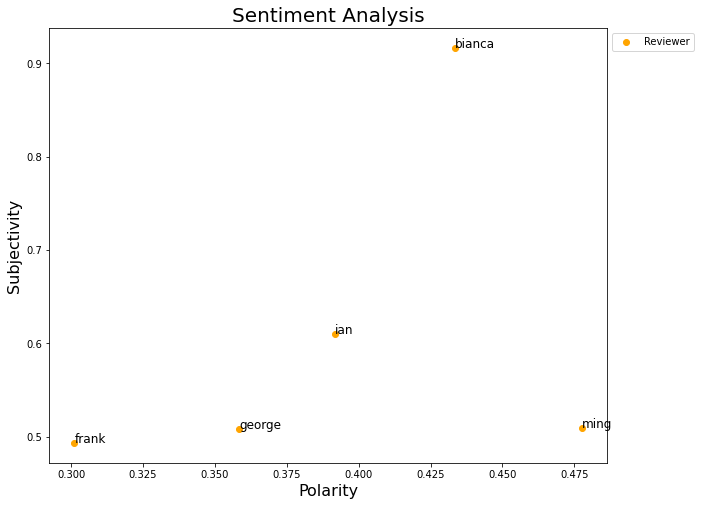

In [22]:
#C2

#Scatter plot it out to view the Sentiment of reviews from each reviewer

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10,8]

for index, reviewer in enumerate(sDF.comments):
    x = sDF.polarity.loc[index]
    y = sDF.subjectivity.loc[index]
    plt.scatter(x,y,c='orange')
    plt.text(x, y, sDF['reviewer_name'][index], fontsize=12)

    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('Polarity', fontsize=16)
plt.ylabel('Subjectivity', fontsize=16)
plt.legend(['Reviewer'], loc='upper left', bbox_to_anchor=(1, 1)) #Put this legend outside the plot 

plt.show()

In [23]:
#C3
#We apply 1 - Positive | -1 - Negative

for index, row in sDF.iterrows():
    if(sDF['polarity'][index]>0):
        sDF.at[index, 'sentiment'] = '1'
    elif(SDF['polarity'][index]<0):
        sDF.at[index, 'sentiment'] = '-1'

sDF



,reviewer_name,comments,polarity,subjectivity,sentiment
0,bianca,cute and cozy place perfect location to everything,0.433333,0.916667,1
1,frank,kelly has a great room in a very central location beautiful building architecture and a style that we really like we felt guite at home here and wish we had spent more time went for a walk and found seattle center with a major food festival in progress what a treat visited the space needle and the chihuly glass exhibit then pikes place market wow thanks for a great stay,0.301136,0.493182,1
2,ian,very spacious apartment and in a great neighborhood this is the kind of apartment i wish i had didnt really get to meet kelly until i was on my out but she was always readily available by phone i believe the only issue if you want to call it that was finding a place to park but i sincerely doubt its easy to park anywhere in a residential area after pm on a friday,0.391667,0.610417,1
3,george,close to seattle center and all it has to offer ballet theater museum space needle restaurants of all ilk just blocks away and the metropolitan probably the coolest grocer youll ever find easy to find and kelly was warm welcoming and really interesting to talk to,0.358333,0.508333,1
4,ming,kelly was a great host and very accommodating in a great neighborhood she has some great coffee and while i wasnt around much during my stay the time i spent interacting with her was very pleasant the apartment is in a great location and very close to the seattle center the neighborhood itself has a lot of good food as well,0.477576,0.509091,1


In [24]:
#??????

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

VM = sDF[['comments', 'sentiment']]


#This will vectorize all the words into "vocab" array
vect = CountVectorizer(binary=True)
x = vect.fit_transform(VM.comments)
x.toarray()


#For first comment, it checks if words are inside the "vocab" array
#The rows of words will be ALL the words that is given in the comments
list(zip(x.toarray()[0], vect.get_feature_names()))



[(0, 'accommodating'),
 (0, 'after'),
 (0, 'all'),
 (0, 'always'),
 (1, 'and'),
 (0, 'anywhere'),
 (0, 'apartment'),
 (0, 'architecture'),
 (0, 'area'),
 (0, 'around'),
 (0, 'as'),
 (0, 'at'),
 (0, 'available'),
 (0, 'away'),
 (0, 'ballet'),
 (0, 'beautiful'),
 (0, 'believe'),
 (0, 'blocks'),
 (0, 'building'),
 (0, 'but'),
 (0, 'by'),
 (0, 'call'),
 (0, 'center'),
 (0, 'central'),
 (0, 'chihuly'),
 (0, 'close'),
 (0, 'coffee'),
 (0, 'coolest'),
 (1, 'cozy'),
 (1, 'cute'),
 (0, 'didnt'),
 (0, 'doubt'),
 (0, 'during'),
 (0, 'easy'),
 (0, 'ever'),
 (1, 'everything'),
 (0, 'exhibit'),
 (0, 'felt'),
 (0, 'festival'),
 (0, 'find'),
 (0, 'finding'),
 (0, 'food'),
 (0, 'for'),
 (0, 'found'),
 (0, 'friday'),
 (0, 'get'),
 (0, 'glass'),
 (0, 'good'),
 (0, 'great'),
 (0, 'grocer'),
 (0, 'guite'),
 (0, 'had'),
 (0, 'has'),
 (0, 'her'),
 (0, 'here'),
 (0, 'home'),
 (0, 'host'),
 (0, 'if'),
 (0, 'ilk'),
 (0, 'in'),
 (0, 'interacting'),
 (0, 'interesting'),
 (0, 'is'),
 (0, 'issue'),
 (0, 'it'),
 (0,

In [25]:


# Splitting into train and test set
X = VM.comments
y = VM.sentiment

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.1)

#Fit the vectorizer on training set
X_train_vect = vect.fit_transform(X_train) 


In [26]:
#Naive Bayes

from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()

nb.fit(X_train_vect, y_train)

nb.score(X_train_vect, y_train)

X_test_vect = vect.transform(X_test)

y_pred = nb.predict(X_test_vect)

y_pred

array(['1'], dtype='<U1')

Accuracy: 100.00%

COnfusion Matrix:
 [[1]]


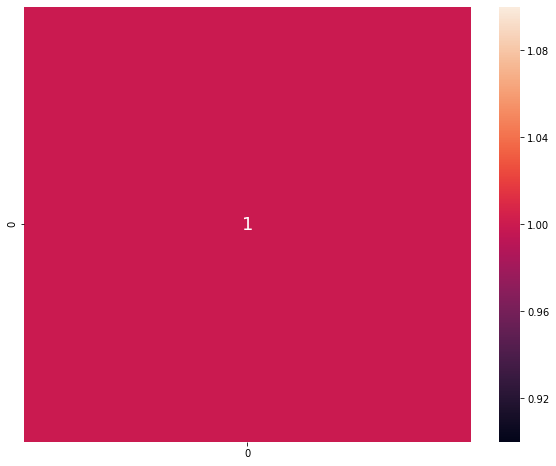

In [27]:
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sb


sb.heatmap(confusion_matrix(y_test, y_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

print("Accuracy: {:.2f}%".format(accuracy_score(y_test, y_pred) * 100))
print("\nCOnfusion Matrix:\n", confusion_matrix(y_test, y_pred))

(-0.5, 399.5, 199.5, -0.5)

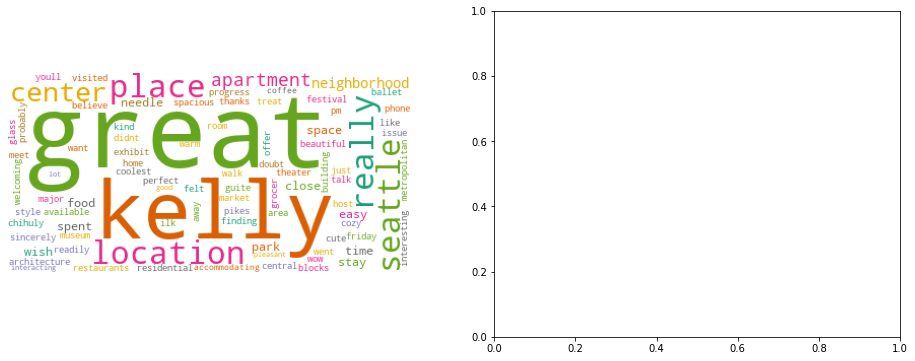

In [28]:
#Use this to show positive vs negative words

P = sDF[sDF['sentiment'] == 'Positive']
P = sDF['comments']
N = sDF[sDF['sentiment'] == 'Negative']
N = sDF['comments']

combP = ' '.join(P)
combN = ' '.join(N)

cloud = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2", max_font_size=100, random_state=30)

plt.rcParams['figure.figsize'] = [16, 6]

wordcloud = cloud.generate(combP)
#wordcloud2 = WordCloud().generate(combN)


f, (ax1, ax2) = plt.subplots(1, 2)

ax1.imshow(wordcloud)
ax1.axis("off")

# ax2.imshow(wordcloud2)
# ax2.axis("off")